C:\Users\HL\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


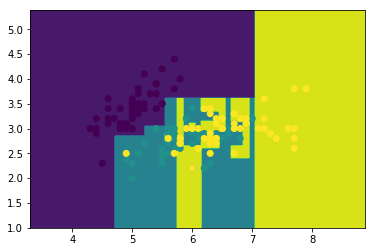

决策树的准确率： 0.7368421052631579


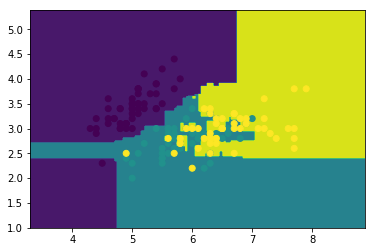

随机森林的准确率： 0.7894736842105263


In [1]:
import numpy  as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier #随机森林
from sklearn import tree #决策树
from sklearn.model_selection import train_test_split

#加载数据
iris = datasets.load_iris()
x_data = iris.data[:,:2]
y_data = iris.target

#分割数据
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data)

def plot(model):
    #获取数据值所在的范围
    x_min,x_max = x_data[:,0].min()-1,x_data[:,0].max()+1
    y_min,y_max = x_data[:,1].min()-1,x_data[:,1].max()+1
    
    #生成网格矩阵
    xx,yy = np.meshgrid(np.arange(x_min,x_max,0.02),
                       np.arange(y_min,y_max,0.02))
    z = model.predict(np.c_[xx.ravel(),yy.ravel()])
    z = z.reshape(xx.shape)
    #画出等高线
    cs = plt.contourf(xx,yy,z)


## -----------  决策树 算法 -----------
dtree = tree.DecisionTreeClassifier()
dtree.fit(x_train,y_train)
plot(dtree)

#样本散点图
plt.scatter(x_data[:,0],x_data[:,1],c=y_data)
plt.show()

#准确率
print("决策树的准确率：",dtree.score(x_test,y_test))

## -----------  随机森林 -----------
RF = RandomForestClassifier(n_estimators = 50)
RF.fit(x_train,y_train)
plot(RF)
RF.score(x_test,y_test)

#样本散点图
plt.scatter(x_data[:,0],x_data[:,1],c=y_data)
plt.show()

#准确率
print("随机森林的准确率：",RF.score(x_test,y_test))
